In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFECV,RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


In [18]:
select_hyper_TSS=pd.read_csv('../result/result_regulation_dbeta_0.35.csv')
select_hyper_TSS=select_hyper_TSS[(select_hyper_TSS['methylation_level']=='Hyper') & ((select_hyper_TSS['feature']=='TSS1500')|(select_hyper_TSS['feature']=='TSS200'))]
select_hyper_TSS

,ID,dbeta,gene,"J,J","J,CZ","J,ER","J,F1","CZ,J","CZ,CZ","CZ,ER",...,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,methylation_level,regulation
1,cg10266490,0.403402,ACOT11,0.6750,0.6750,0.6750,0.6750,0.70090,0.70090,0.70090,...,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN,Hyper,Up
6,cg26573704,0.408026,ADAMTS12,0.6375,0.6375,0.6375,0.6375,0.66415,0.66415,0.66415,...,island,TSS200-island,chr5:33892191-33892403,True,NaN,high-CpG:33927847-33928066,NaN,NaN,Hyper,Up
8,cg19619405,0.446404,ADAMTS20,0.7400,0.7400,0.6775,0.7400,0.75600,0.75600,0.70005,...,island,TSS200-island,chr12:43944719-43946285,NaN,NaN,NaN,rs275603,rs71455455,Hyper,Up
14,cg09651145,0.409495,AFAP1L1,0.7075,0.7075,0.6075,0.6975,0.72675,0.72675,0.63900,...,island,TSS1500-island,chr5:148650920-148651772,True,NaN,NaN,NaN,NaN,Hyper,Up
20,cg08076018,0.461530,ANGPTL2,0.5925,0.5925,0.4175,0.5900,0.62995,0.62995,0.48575,...,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN,Hyper,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,cg19593767,0.350825,TOX2,0.6800,0.6800,0.5900,0.6800,0.70200,0.70200,0.63080,...,island,TSS200-island,chr20:42543097-42545137,True,NaN,NaN,NaN,NaN,Hyper,Up
366,cg11213574,0.371360,TRABD,0.8275,0.8275,0.8375,0.8275,0.83280,0.83280,0.84365,...,island,TSS1500-island,chr22:50623164-50625226,NaN,True,NaN,NaN,NaN,Hyper,Up
372,cg07783282,0.402763,USP44,0.7200,0.7200,0.7675,0.7200,0.72960,0.72960,0.77785,...,island,TSS1500-island,chr12:95941906-95942979,True,NaN,NaN,NaN,NaN,Hyper,Up
382,cg06274159,0.420303,ZFP42,0.5700,0.5725,0.5725,0.5725,0.60900,0.60690,0.60690,...,island,TSS200-island,chr4:188916605-188916876,NaN,NaN,NaN,NaN,NaN,Hyper,Up


In [19]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.35.csv')
normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.35.csv')

In [20]:
normalized_train_c = pd.merge(normalized_train, normalized_test, on = "Unnamed: 0")
normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(select_hyper_TSS['ID'])]
normalized_train_c.iloc[:,1::2]

,1_x,3_x,5_x,7_x,9_x,11_x,13_x,15_x,17_x,19_x,...,881_y,883_y,885_y,887_y,889_y,891,893,895,897,899
0,0.229817,0.079642,0.180363,0.182330,0.156993,0.174448,0.170768,0.283547,0.299189,0.173554,...,0.733207,0.810674,0.629002,0.631744,0.489297,0.620474,0.587984,0.725763,0.543097,0.627478
3,0.029336,0.031738,0.052790,0.075713,0.052144,0.058213,0.056716,0.066261,0.170566,0.056618,...,0.668870,0.884092,0.657520,0.776370,0.573960,0.702896,0.742537,0.722355,0.619104,0.588905
8,0.038396,0.042117,0.082929,0.100448,0.018773,0.123761,0.060578,0.186393,0.349413,0.053956,...,0.703152,0.785134,0.017098,0.781220,0.750677,0.829628,0.711433,0.808927,0.784102,0.027320
15,0.027609,0.025782,0.049212,0.175750,0.064068,0.038841,0.065511,0.048958,0.124838,0.041172,...,0.070183,0.116336,0.067032,0.795447,0.709611,0.697383,0.527117,0.501497,0.799886,0.077927
17,0.052691,0.035724,0.050791,0.112244,0.048276,0.064553,0.040120,0.060777,0.112316,0.039051,...,0.641107,0.730824,0.389601,0.688854,0.587882,0.648012,0.611959,0.611590,0.593076,0.418179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.231621,0.144552,0.101374,0.161753,0.051920,0.116728,0.099301,0.162901,0.392257,0.122150,...,0.859693,0.641820,0.939523,0.923721,0.867354,0.918738,0.626382,0.835459,0.853828,0.793100
369,0.286010,0.089658,0.278705,0.310905,0.264841,0.398138,0.317772,0.406807,0.502564,0.269425,...,0.808848,0.840784,0.858320,0.817132,0.746696,0.846385,0.602118,0.745292,0.740818,0.740632
376,0.071776,0.032173,0.099534,0.227998,0.056563,0.132320,0.110678,0.176403,0.413780,0.075362,...,0.847574,0.779241,0.681112,0.846710,0.795247,0.847231,0.671809,0.637060,0.808902,0.728156
380,0.291352,0.047059,0.154173,0.202507,0.105295,0.242842,0.277461,0.428910,0.404368,0.141991,...,0.859093,0.675661,0.613787,0.928101,0.918148,0.272924,0.468551,0.791687,0.877826,0.576459


In [150]:
X_train = normalized_train_c.iloc[:, 1::2]
x = [X_train.iloc[:, i].values.flatten().tolist() for i in range(895)]
y = [(0 if (i < 47) or (i > 444 and i < 495) else 1) for i in range(895)]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"訓練集樣本數量： {len(X_train)}")
print(f"測試集樣本數量： {len(X_test)}")
train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)
print("訓練集中各類別樣本數量：")
print(train_class_distribution)
print("測試集中各類別樣本數量：")
print(test_class_distribution)

訓練集樣本數量： 716
測試集樣本數量： 179
訓練集中各類別樣本數量：
Counter({1: 637, 0: 79})
測試集中各類別樣本數量：
Counter({1: 161, 0: 18})


 RFE 篩選

Selected Features:      Unnamed: 0
146  cg14231297
Selected Features:      Unnamed: 0
146  cg14231297
Selected Features:      Unnamed: 0
146  cg14231297
Selected Features:      Unnamed: 0
146  cg14231297
Selected Features:      Unnamed: 0
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
177  cg10266490
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
177  cg10266490
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
177  cg10266490
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
177  cg10266490
Selected Features:      Unnamed: 0
106  cg24604013
146  cg14231297
177  cg1026

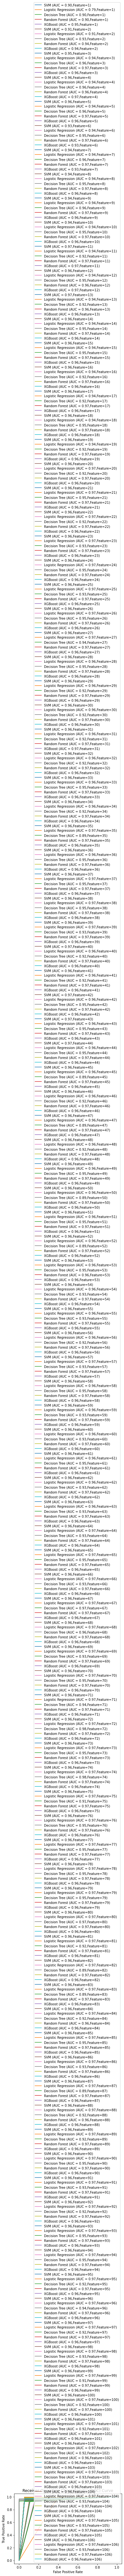

In [154]:
models = {
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = pd.DataFrame(columns=['Model', 'Features'])
# model = SVC(kernel="linear")
model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = XGBClassifier()

for feature_count in range(1,107,1):
    rfe = RFE(estimator=model, n_features_to_select=feature_count)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    selected_feature_indices = rfe.support_
    selected_feature_names = pd.DataFrame(normalized_train_c.iloc[selected_feature_indices,0])
    feature_ranking = rfe.ranking_

    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
    # rfe.support_: The mask of selected features.
    # rfe.ranking_: The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature.
    # Selected (i.e., estimated best) features are assigned rank 1.

    for test_model_name in ["SVM", "Logistic Regression","Decision Tree", "Random Forest", "XGBoost"]:
        test_model=models[test_model_name]
        test_model.fit(X_train_rfe, y_train)
        train_accuracy_cv = cross_val_score(test_model, X_train_rfe, y_train, cv=5, scoring='accuracy').mean() # 計算訓練集上的準確度 (使用交叉驗證)

        X_test_rfe = rfe.transform(X_test) # 在測試集上進行預測
        y_pred = test_model.predict(X_test_rfe)

        X_test_df = pd.DataFrame(X_test)
        incorrect_predictions = X_test_df.loc[y_pred != y_test]
        incorrect_indices = X_test_df.index[y_pred != y_test] # 獲得預測錯誤的樣本索引

        accuracy_test = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred) #1 表示完美預測，0 表示模型的性能與隨機預測相當，而 -1 表示完全相反的預測。
        
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{test_model_name} (AUC = {roc_auc:.2f},Feature={feature_count})')

        new_row = {
            'Model': test_model_name, 
            'Features': feature_count,
            'f1_score': f1,
            'AUC': roc_auc,
            # 'Precision': precision,
            # 'Accuracy': (train_accuracy_cv + accuracy_test) / 2,
            'Train Accuracy (Cross-Validation)': train_accuracy_cv,
            'Test Accuracy': accuracy_test,
            # 'difference': train_accuracy_cv - accuracy_test,
            'J-index': recall + accuracy_test - (1 - recall) - 1,
            'Selected Features': selected_feature_names,
            'Incorrect Predictions': len(incorrect_indices)
        }

        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

        
        print('Selected Features:',selected_feature_names)
        

plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

In [35]:
results.to_csv('../result/RFE_0.35_Hyper&TSS.csv', index=False)

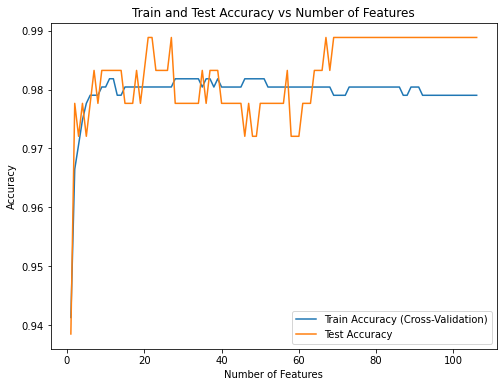

In [155]:
model_results = results[results['Model']=="Logistic Regression"]

plt.figure(figsize=(8, 6))
plt.plot(model_results['Features'], model_results['Train Accuracy (Cross-Validation)'], label='Train Accuracy (Cross-Validation)')
plt.plot(model_results['Features'], model_results['Test Accuracy'], label='Test Accuracy')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Features')

plt.legend()

plt.show()


1. 剩下40個做 RFECV  
結果: 數量太多無法確定最佳特徵數
2. 40個做GO分群再用RFECV  
第1群:12  
第2群:11  
第3群:5  
第4群:11
* 少一個是缺 TRABD(正常，在計算相似度就沒有了)

In [55]:
method1_gene = pd.read_csv("../result/RFE_method1/RFE_gene_40.csv")
select_hyper_TSS = select_hyper_TSS[select_hyper_TSS['ID'].isin(method1_gene['ID'])]

# GO轉 Entrez ID有換別名
select_hyper_TSS[select_hyper_TSS['gene'] == 'GRASP'] = 'TAMALIN'
select_hyper_TSS[select_hyper_TSS['gene'] == 'SLC9A3R1'] = 'NHERF1'

# MIR1204、TRABD 沒有出現在4群中(正常，在計算相似度就沒有了)
cluster_1 = pd.read_csv('../result/wards_cluster/gene_clusters_1.csv')
cluster_1 = select_hyper_TSS[select_hyper_TSS['gene'].isin(cluster_1['Gene'])]

cluster_2 = pd.read_csv('../result/wards_cluster/gene_clusters_2.csv')
cluster_2 = select_hyper_TSS[select_hyper_TSS['gene'].isin(cluster_2['Gene'])]

cluster_3 = pd.read_csv('../result/wards_cluster/gene_clusters_3.csv')
cluster_3 = select_hyper_TSS[select_hyper_TSS['gene'].isin(cluster_3['Gene'])]

cluster_4 = pd.read_csv('../result/wards_cluster/gene_clusters_4.csv')
cluster_4 = select_hyper_TSS[select_hyper_TSS['gene'].isin(cluster_4['Gene'])]

cluster_1.to_csv("../result/RFE_method1/40_GOcluster1.csv", index=False)
cluster_2.to_csv("../result/RFE_method1/40_GOcluster2.csv", index=False)
cluster_3.to_csv("../result/RFE_method1/40_GOcluster3.csv", index=False)
cluster_4.to_csv("../result/RFE_method1/40_GOcluster4.csv", index=False)


In [16]:
data=pd.read_csv("../result/RFE_method1/40_GOcluster1.csv") #cluster_1
data

,ID,dbeta,gene,"J,J","J,CZ","J,ER","J,F1","CZ,J","CZ,CZ","CZ,ER",...,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,methylation_level,regulation
0,cg18759209,0.373932,BMP7,0.6950,0.6950,0.6950,0.6950,0.71370,0.71370,0.71370,...,shore,TSS1500-shore,chr20:55840216-55841794,True,NaN,NaN,NaN,NaN,Hyper,Up
1,cg09293816,0.364452,FCGRT,0.7750,0.7750,0.7750,0.7750,0.78760,0.78760,0.78760,...,shore,TSS200-shore,chr19:50016531-50016851,True,NaN,NaN,NaN,NaN,Hyper,Up
2,cg26405020,0.369003,FES,0.7400,0.7400,0.7400,0.7400,0.75600,0.75600,0.75600,...,shore,TSS1500-shore,chr15:91427540-91427905,True,NaN,NaN,NaN,NaN,Hyper,Up
3,cg04037038,0.368369,FRZB,0.6750,0.6750,0.6750,0.6750,0.69810,0.69810,0.69810,...,island,TSS1500-island,chr2:183731819-183732093,True,NaN,NaN,NaN,NaN,Hyper,Up
4,cg01158680,0.407395,MAGI2,0.6375,0.6375,0.6375,0.6375,0.66885,0.66885,0.66885,...,shore,TSS1500-shore,chr7:79082174-79082427,NaN,NaN,NaN,NaN,NaN,Hyper,Up
5,cg07792478,0.438058,MIR124-2,0.8350,0.8350,0.8350,0.8350,0.84000,0.84000,0.84000,...,island,TSS1500-island,chr8:65290108-65290946,NaN,NaN,NaN,NaN,NaN,Hyper,Up
6,cg18710784,0.413429,OPCML,0.7975,0.7175,0.7175,0.7175,0.80605,0.73710,0.73710,...,island,TSS1500-island,chr11:132813562-132814395,NaN,NaN,NaN,NaN,NaN,Hyper,Up
7,cg02571816,0.355784,PPP1R14A,0.7675,0.7675,0.7675,0.7675,0.77970,0.77970,0.77970,...,island,TSS1500-island,chr19:38746638-38747379,True,NaN,NaN,NaN,NaN,Hyper,Up
8,cg27494647,0.419924,RARRES2,0.6350,0.6350,0.6350,0.6350,0.66830,0.66830,0.66830,...,island,TSS200-island,chr7:150037459-150039031,True,NaN,NaN,NaN,NaN,Hyper,Up
9,cg24848035,0.435928,RGS22,0.6475,0.6475,0.5550,0.6475,0.67855,0.67855,0.59850,...,island,TSS200-island,chr8:101117922-101118693,NaN,True,NaN,rs2980532,NaN,Hyper,Up


In [21]:
normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(data['ID'])]
X_train = normalized_train_c.iloc[:, 1::2]
x = [X_train.iloc[:, i].values.flatten().tolist() for i in range(895)]
y = [(0 if (i < 47) or (i > 444 and i < 495) else 1) for i in range(895)]

2
Optimal Number of Features: 11
cross validation f1 score 0.9887981637859509
Feature Select: [False  True  True  True  True  True  True  True  True  True  True  True]
3
Optimal Number of Features: 9
cross validation f1 score 0.9899984306671069
Feature Select: [False  True  True  True  True False  True False  True  True  True  True]
4
Optimal Number of Features: 9
cross validation f1 score 0.9900402446475554
Feature Select: [False  True  True  True  True False  True False  True  True  True  True]
5
Optimal Number of Features: 9
cross validation f1 score 0.9900348765083915
Feature Select: [False  True  True  True  True False  True False  True  True  True  True]
6
Optimal Number of Features: 9
cross validation f1 score 0.9906597011012533
Feature Select: [False  True  True  True  True False  True False  True  True  True  True]
7
Optimal Number of Features: 7
cross validation f1 score 0.9906693605264875
Feature Select: [False  True  True  True  True False  True False  True False False  Tru

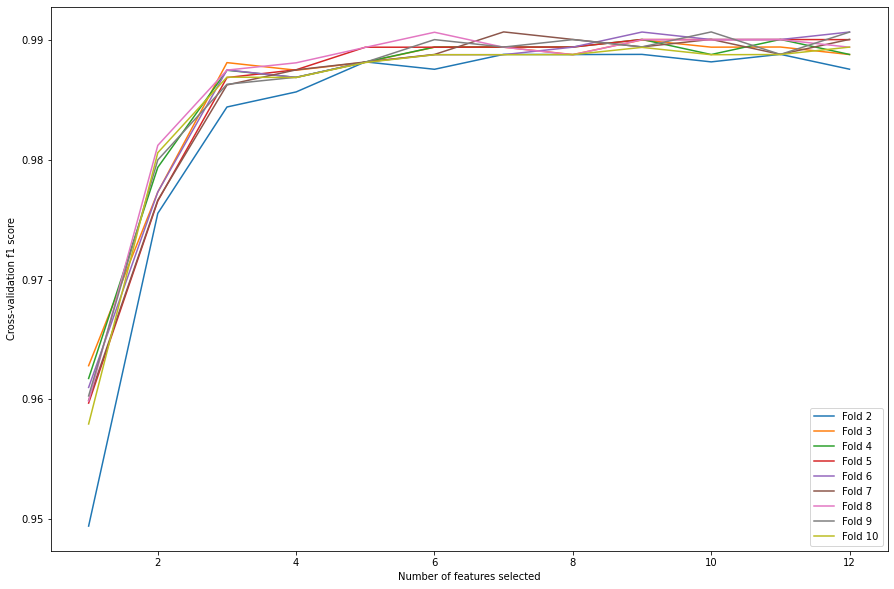

In [22]:
model=RandomForestClassifier(n_estimators=100, 
                            max_depth=10, 
                            min_samples_split=5, 
                            min_samples_leaf=2,
                            min_impurity_decrease=0.0,
                            random_state=42)

plt.figure(figsize=(15, 10))
for fold in range(2,11):
    stratified_kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    print(stratified_kfold.get_n_splits(x, y))

    rfecv = RFECV(estimator=model, step=1, cv=stratified_kfold, scoring='f1')
    fitted_rfecv = rfecv.fit(x, y)

    print("Optimal Number of Features:", fitted_rfecv.n_features_)
    print("cross validation f1 score", max(fitted_rfecv.cv_results_['mean_test_score']))
    # print("Feature Rankings:", fitted_rfecv.ranking_)
    print("Feature Select:",fitted_rfecv.support_)

    x_val = range(1, len(fitted_rfecv.cv_results_['mean_test_score']) + 1)
    y_val = fitted_rfecv.cv_results_['mean_test_score']
    plt.plot(x_val, y_val, label=f"Fold {fold}")
        
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation f1 score")
plt.legend(loc="lower right")
plt.show()

